In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

    
    # Load the subject's DataFrame
big_df = pd.read_csv(r"W:\Projects\2019-04 M1M1PAS Project\analysis\source_Paolo\fc_source\sourceConnectivity.csv",index_col=0)

# Print the reshaped DataFrame
print(big_df)

        subject    task  run       plv      wpli     ciplv       aec
0            11  negneg    1  0.427669  0.530467  0.266292  0.032008
1            11  negneg    1  0.333473  0.645130  0.299940  0.118135
2            11  negneg    1  0.359812  0.734700  0.334751  0.160252
3            11  negneg    1  0.216345  0.410930  0.090477  0.311490
4            11  negneg    1  0.866527  0.625364  0.474751  0.108204
...         ...     ...  ...       ...       ...       ...       ...
224382        9  random    5  0.689316  0.861822  0.489246  0.166970
224383        9  random    5  0.925783  0.995877  0.862048  0.433289
224384        9  random    5  0.865516  0.987685  0.799613  0.252745
224385        9  random    5  0.840782  0.964957  0.778304  0.214949
224386        9  random    5  0.937025  0.991288  0.856954  0.200597

[224387 rows x 7 columns]


In [8]:
big_df['run'] = big_df['run'].astype(str)
big_df.dtypes
print(big_df.isna().sum())

subject    0
task       0
run        0
plv        0
wpli       0
ciplv      0
aec        0
dtype: int64


In [37]:
con_mes = 'aec'

In [38]:
# Group by the desired columns and calculate both mean and standard error
summary_df_ind = big_df.groupby(['run', 'task', 'subject'], as_index=False).agg(
    median_sub_connect=(con_mes, 'median'),
)
print(summary_df_ind)

    run    task  subject  median_sub_connect
0     1  negneg        1            0.186035
1     1  negneg        2            0.182149
2     1  negneg        3            0.199341
3     1  negneg        4            0.194510
4     1  negneg        5            0.175729
..   ..     ...      ...                 ...
314   5  random       13            0.163713
315   5  random       14            0.180101
316   5  random       15            0.181048
317   5  random       16            0.178303
318   5  random       17            0.192725

[319 rows x 4 columns]


In [39]:
# Function to calculate 25th and 75th percentiles
def q25(x):
    return np.percentile(x, 25)

def q75(x):
    return np.percentile(x, 75)

# Group by 'subject', 'run', 'task', 'connect_type' and calculate medians and quartiles
summary_df = summary_df_ind.groupby(['run', 'task']).agg(
    median_connect=('median_sub_connect', 'median'),
    q1_connect=('median_sub_connect', q25),
    q3_connect=('median_sub_connect', q75)
).reset_index()

# Calculate the errors (distance between median and quartiles)
summary_df['lower_err'] = summary_df['median_connect'] - summary_df['q1_connect']
summary_df['upper_err'] = summary_df['q3_connect'] - summary_df['median_connect']

C:\Users\Maria\AppData\Local\Temp\ipykernel_26832\2298713177.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


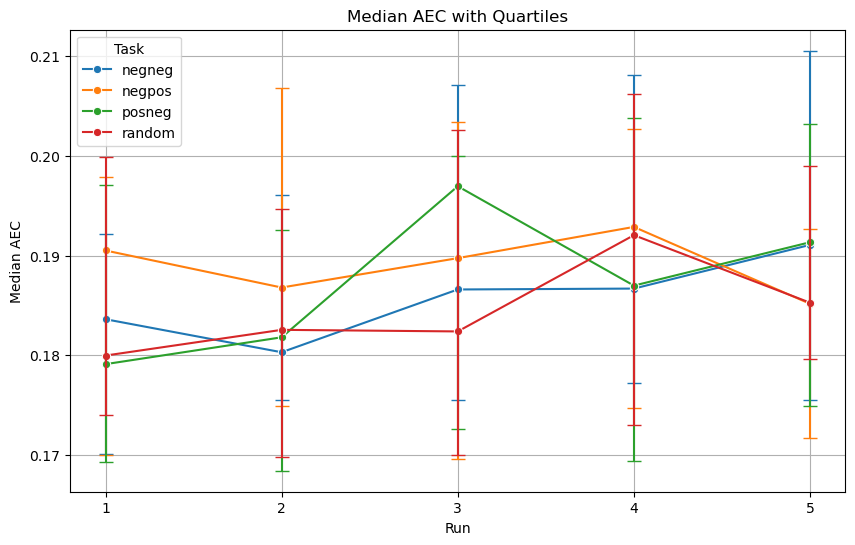

In [40]:
data_to_plot = summary_df

# Plot
plt.figure(figsize=(10, 6))

# Plot the median values using seaborn
sns.lineplot(
    data=data_to_plot, 
    x='run', 
    y='median_connect', 
    hue='task', 
    marker='o', 
    ci=None  # We will add custom error bars for quartiles
)

# Get the colors used by seaborn for each task line
palette = sns.color_palette()

# Add custom error bars for the quartiles with the same colors as the lines
for i, task in enumerate(data_to_plot['task'].unique()):
    task_data = data_to_plot[data_to_plot['task'] == task]
    plt.errorbar(
        task_data['run'], 
        task_data['median_connect'], 
        yerr=[task_data['lower_err'], task_data['upper_err']], 
        fmt='none',  # No line, just error bars
        capsize=5,  # Optional: adds caps to the error bars
        color=palette[i],  # Apply the same color as the line
    )

# Customize the plot
plt.title("Median AEC with Quartiles")
plt.xlabel("Run")
plt.ylabel("Median AEC")
plt.legend(title="Task")
plt.grid(True)

# Show the plot
plt.show()

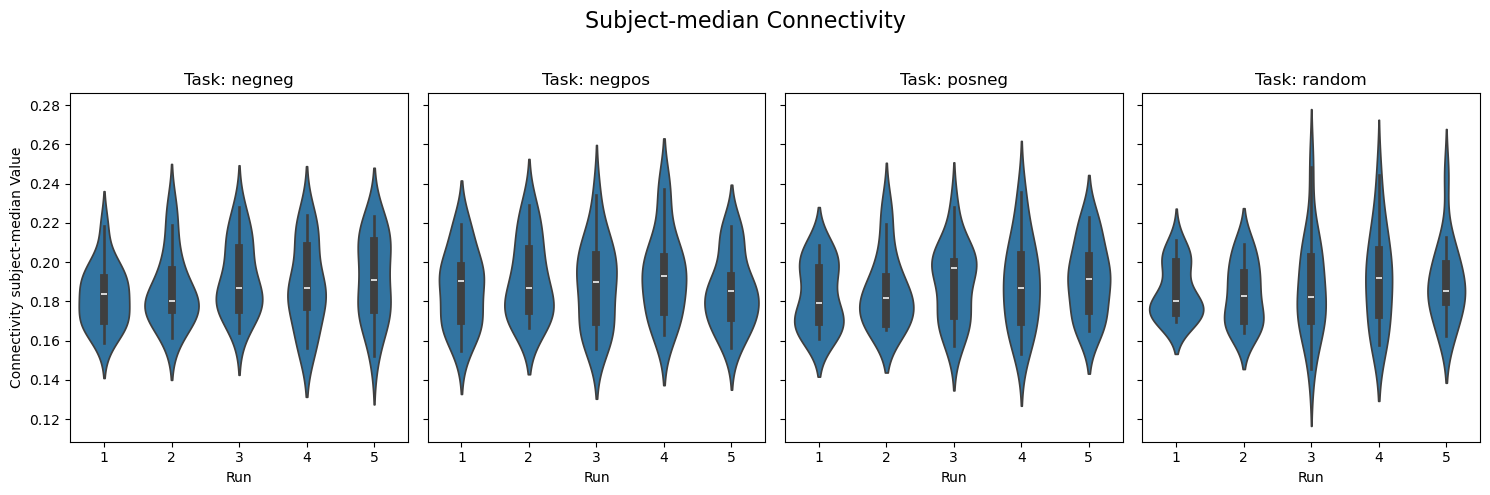

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
    
# Get the unique tasks for this subject
tasks = summary_df_ind['task'].unique()
    
# Create a figure with subplots for each task
fig, axes = plt.subplots(nrows=1, ncols=len(tasks), figsize=(15, 5), sharey=True)
fig.suptitle(f'Subject-median Connectivity', fontsize=16)

    
# Iterate through tasks and create a violin plot for each
for i, task in enumerate(tasks):
    task_df = summary_df_ind[summary_df_ind['task'] == task]
    sns.violinplot(ax=axes[i], x='run', y='median_sub_connect', data=task_df)
    axes[i].set_title(f'Task: {task}')
    axes[i].set_xlabel('Run')
    axes[i].set_ylabel('Connectivity subject-median Value')

# Show the plot for this subject
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()